In [1]:
# Import the reuters dataset
from keras.datasets import reuters

In [4]:
# Load the reuters dataset taking 10000 most common words
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 3s 1us/step


In [95]:
import numpy as np

In [96]:
#Creating a function that will transform my list into a tensor
def vectorize_sequence(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i , sequence] = 1
    return results

In [112]:
#Creating a function that will help transform my labels
def to_one_hot(labels,dimensions=46):
    results = np.zeros((len(labels),dimensions))
    for i , label in enumerate(labels):
        results[i, label] = 1
    return results

In [97]:
#Transforming my training and testing data
vec_train_data = vectorize_sequence(train_data)
vec_test_data = vectorize_sequence(test_data)

In [113]:
#Transforming my training and testing labels into a vector
vec_train_labels = to_one_hot(train_labels)
vec_test_labels = to_one_hot(test_labels)

In [101]:
#Importing useful libraries
from keras import models
from keras import layers

In [116]:
#Building my model

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
    
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [114]:
# Split the data into validation and training set
x_train = vec_train_data[1000:]
x_val = vec_train_data[:1000]
y_train = vec_train_labels[1000:]
y_val = vec_train_labels[:1000]

In [126]:
# fit the model on the training set
history = model.fit(x_train,y_train,epochs=20,batch_size=512,
         validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 65ms/step - loss: 0.1165 - accuracy: 0.9565 - val_loss: 1.1491 - val_accuracy: 0.7970
Epoch 2/20
16/16 [==============================] - 1s 60ms/step - loss: 0.1086 - accuracy: 0.9574 - val_loss: 1.1182 - val_accuracy: 0.7990
Epoch 3/20
16/16 [==============================] - 1s 58ms/step - loss: 0.1043 - accuracy: 0.9590 - val_loss: 1.1358 - val_accuracy: 0.8080
Epoch 4/20
16/16 [==============================] - 1s 60ms/step - loss: 0.1087 - accuracy: 0.9577 - val_loss: 1.1270 - val_accuracy: 0.7980
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.1026 - accuracy: 0.9575 - val_loss: 1.2623 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.1039 - accuracy: 0.9575 - val_loss: 1.1899 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 61ms/step - loss: 0.1000 - accuracy: 0.9582 - val_loss: 1.1780 - val_accuracy: 0.7970
Epoch 8/20
16

In [127]:
dic = history.history

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

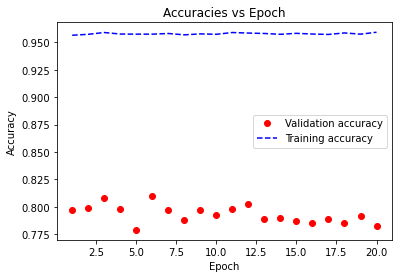

In [128]:
# A plot to show the variation of accuracies with epoch
val_acc = dic['val_accuracy']
train_acc = dic['accuracy']
epoch = range(1, len(val_acc)+1)
plt.plot(epoch, val_acc, 'o', color='red', label= 'Validation accuracy')
plt.plot(epoch, train_acc, '--', color='blue', label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracies vs Epoch')
plt.legend()

In [129]:
results = model.evaluate(vec_test_data,vec_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 1.5619 - accuracy: 0.7667


In [130]:
results

[1.5618854761123657, 0.7666963338851929]